In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import requests
import pprint
import json
from urllib.parse import urljoin
plt.rcParams["font.family"] = 'AppleGothic'  # 사용할 한글 폰트 설정

# 동구동락 블로그 웹크롤링


In [2]:
import pyperclip
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
# 웹 브라우저를 실행
driver = webdriver.Chrome()
## 네이버 요청
driver.get('https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%EC%86%A1%EB%8F%84+%EB%A7%A5%EC%A3%BC+%EC%B6%95%EC%A0%9C+%ED%9B%84%EA%B8%B0&oquery=%EC%86%A1%EB%8F%84+%EB%A7%A5%EC%A3%BC+%EC%B6%95%EC%A0%9C&tqi=iAWuRwqVOZosscZr0rGssssstuN-431799')

In [6]:
#네이버 검색창 검색어 입력
element = driver.find_element(By.CSS_SELECTOR,'input[id="query"]')
element.send_keys('대전 동구동락 축제 후기')

In [7]:
element.send_keys(Keys.ENTER)

In [8]:
# 블로그 카테고리 클릭
blog_element = driver.find_element(By.XPATH,'//*[@id="lnb"]/div[1]/div')
blog_btn=blog_element.find_element(By.CSS_SELECTOR,'#lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(1)')
blog_btn.click()

In [9]:
# 블로그 링크 뽑아오기

In [4]:
html = driver.page_source
soup = bs(html,'html.parser')

In [5]:
blog_sector = soup.find('div',{'class':'api_subject_bx'})
links = blog_sector.find_all('div',{'class':'title_area'})

In [6]:
# 동고동락 축제 블로그 링크모음
link = []
for i in range(len(links)):
    link.append(links[i].find('a')['href'])
link

['https://blog.naver.com/orange5436/223205405315',
 'https://blog.naver.com/merrishop/222876078760',
 'https://blog.naver.com/hsjung6765/223199786813',
 'https://blog.naver.com/zozld/223201821633',
 'https://blog.naver.com/ryuggomi/223196273455',
 'https://blog.naver.com/meplaire/222863421884',
 'https://blog.naver.com/915kin/223194407657',
 'https://blog.naver.com/isfp_isfj_/223200674527',
 'https://blog.naver.com/e5174/222860777213',
 'https://blog.naver.com/dawnnavy/222864859735',
 'https://post.naver.com/viewer/postView.naver?volumeNo=36585363&memberNo=21959512&vType=VERTICAL',
 'https://blog.naver.com/hocean_/223194826645',
 'https://blog.naver.com/00sweetlove/223194792069',
 'https://blog.naver.com/jijili/222859629341',
 'https://blog.naver.com/yunha7676/223194653496',
 'https://blog.naver.com/sjn1203/223194923019',
 'https://blog.naver.com/jangjjanga/223193887030',
 'https://blog.naver.com/xinniy/223197133206',
 'https://blog.naver.com/rieulmieum/223199096889',
 'https://blog.na

### 블로그 텍스트 가져오는 웹크롤링 코드 작성

In [13]:
# 웹 브라우저를 실행
driver = webdriver.Chrome()

In [13]:
## 첫번째 블로그 접속
driver.get('https://blog.naver.com/djdonggu/223233843680')

In [14]:
html2 = driver.page_source
soup2 = bs(html2,'html.parser')

In [15]:
txt = soup2.find_all('div',{'class':'se-section se-section-text se-l-default'})

In [16]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
# 블로그 URL
url = "https://blog.naver.com/djdonggu/223233843680"
# requests를 사용하여 웹 페이지 요청
response = requests.get(url)
response.raise_for_status()  # 오류 발생 시 예외를 발생시킴
# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
# iframe 태그의 src 속성 값 가져오기
iframe_src = soup.find('iframe')['src']
# 절대 URL로 변환
absolute_url = urljoin(url, iframe_src)
# iframe의 src로 웹 페이지 요청
iframe_response = requests.get(absolute_url)
iframe_response.raise_for_status()
# BeautifulSoup을 사용하여 iframe의 HTML 파싱
iframe_soup = BeautifulSoup(iframe_response.text, 'html.parser')
# p 태그의 클래스가 'se-text-paragraph'인 텍스트 추출
paragraph_tags = iframe_soup.find_all('p', {'class': 'se-text-paragraph'})
# 본문 텍스트를 저장할 리스트
paragraph_contents = []
# 본문 텍스트 추출
for tag in paragraph_tags:
    content = tag.get_text(strip=True)  # 텍스트 내 공백 제거
    if content:  # 내용이 있다면 추가
        paragraph_contents.append(content)
text=[]
# 결과 출력
for content in paragraph_contents:
    text.append(content)

In [17]:
text

['「2023 대전동구동락축제」 특별한 추억이 된 마지막 날 후기',
 '대전동구동락축제를 홍보하는 직원들',
 '이번 행사는 10월 6일~8일까지 3일간 오전 11시부터 밤 10시까지 동구 소제동 동광장로 대동천 일원에서 ‘도심 속 낭만 여행’이란 구호로 진행이 되는 것으로 동구에서 함께 즐기는 세대 공감 축제입니다.',
 '\u200b',
 '주요 행사 내용은 프리미엄 야시장, 동구동락 콘서트, 소제랜덤 댄스 페스티벌, 소제 여행가요제, 탄소중립 프로그램, 소제 마켓 등으로 구성되어 있습니다.',
 '대전동구동락축제 프리미엄 야시장 배치도',
 '대전전통나래관 사거리를 중심으로 북측에 주 무대가 있고 남쪽에는 포토스팟과 프리미엄 야시장, DJ 부스가 있으며, 동쪽 도로변에는 프리미엄 야시장이 있습니다.',
 '\u200b',
 '대동천변 철갑교에서 가재교 양측에는 많은 부스가 연결되어 있습니다.',
 '\u200b',
 '포토존, 동구청 홍보부스, 체험 부스, 프리마켓, 대학교 홍보부스와 천변을 연결하는 곳에는 수상 무대가 있으며, 후면은 천변을 이동할 수 있는 임시다리로 연결되어 있습니다.',
 '\u200b',
 '이밖에도 먹거리 부스, 종합안내소, 수유실, 화장실, 유모차와 휠체어 대여소가 있습니다.',
 '프리미엄 야시장 입구',
 '마지막인 일요일 행사도 오전 11시에 시작이 되었지만, 본격적으로 오후 늦게부터 관람객이 많이 오시기 시작했으며, 오후 3시경부터 대동천 수상 무대에서 대동천 낭만 버스킹이 시작이 되자 천변 양측에서 젊은 남녀들이 사진 촬영과 함께 관람하기 시작했습니다.',
 '푸드트럭과 일반 부스',
 '제일 먼저 푸드트럭과 먹거리 부스가 즐비한 남측도로변에는 뉴욕핫도그, 닭고기꼬치, 닭강정, 돼지갈비 후라이드, 흑돼지구이 덮밥 등 젊은이가 좋아하는 다양한 메뉴들이 있었는데요,  청년들이 주 고객이었으며 중앙에는 테이블과 파라솔이 있었습니다.',
 '맥주 판매 부스',
 '맥주 부스와 베트남, 중국, 태국, 일본 라면과 국수 부스도 

##### link안에 있는 블로그 링크들을 하나씩 가져와 블로그들의 텍스트들을 뽑아오는 코드
    * iframe 의 src값을 이용해 웹크롤링을 진행하였지만
        블로그들 중 iframe이 없는 html이 존재하여 코드 오류발생

In [7]:
# for ink in link:
#     # 블로그 URL
#     url = ink
#     # requests를 사용하여 웹 페이지 요청
#     response = requests.get(url)
#     response.raise_for_status()  # 오류 발생 시 예외를 발생시킴
#     # BeautifulSoup을 사용하여 HTML 파싱
#     soup = bs(response.text, 'html.parser')
#     # iframe 태그의 src 속성 값 가져오기
#     try :
#         iframe_src = soup.find('iframe')['src']
#         print('iframe있어')
#     except:
#         pass

#     iframe_src = soup.find('iframe')['src']
#     # 절대 URL로 변환
#     absolute_url = urljoin(url, iframe_src)
#     # iframe의 src로 웹 페이지 요청
#     iframe_response = requests.get(absolute_url)
#     iframe_response.raise_for_status()
#     # BeautifulSoup을 사용하여 iframe의 HTML 파싱
#     iframe_soup = bs(iframe_response.text, 'html.parser')
#     # p 태그의 클래스가 'se-text-paragraph'인 텍스트 추출
#     paragraph_tags = iframe_soup.find_all('p', {'class': 'se-text-paragraph'})
#     # 본문 텍스트를 저장할 리스트
#     paragraph_contents = []
#     # 본문 텍스트 추출
#     for tag in paragraph_tags:
#         content = tag.get_text(strip=True)  # 텍스트 내 공백 제거
#         if content:  # 내용이 있다면 추가
#             paragraph_contents.append(content)
#     text=[]
#     # 결과 출력
#     for content in paragraph_contents:
#         text.append(content)
        

##### link안에 있는 블로그 링크들을 하나씩 가져와 블로그들의 텍스트들을 뽑아오는 코드
    * 위의 코드를 수정하여 iframe이 없는 블로그를 제외하고 뽑아오는 코드로 변경

In [8]:
# 각 URL에 대해 반복
# 결과를 저장할 리스트
import re
text = []
cnt = 0
for url in link:
    # requests를 사용하여 웹 페이지 요청
    response = requests.get(url)
    response.raise_for_status()  # 오류 발생 시 예외를 발생시킴

    # BeautifulSoup을 사용하여 HTML 파싱
    soup = bs(response.text, 'html.parser')

    # iframe 태그의 src 속성 값 가져오기
    iframe_tag = soup.find('iframe')
    
    # iframe 태그가 존재하고 src 속성이 있을 경우 작업을 수행
    if iframe_tag and iframe_tag.get('src'):
        iframe_src = iframe_tag['src']

        # 절대 URL로 변환
        absolute_url = urljoin(url, iframe_src)

        # iframe의 src로 웹 페이지 요청
        iframe_response = requests.get(absolute_url)
        iframe_response.raise_for_status()

        # BeautifulSoup을 사용하여 iframe의 HTML 파싱
        iframe_soup = bs(iframe_response.text, 'html.parser')

        # p 태그의 클래스가 'se-text-paragraph'인 텍스트 추출
        paragraph_tags = iframe_soup.find_all('p', {'class': 'se-text-paragraph'})

        # 본문 텍스트를 저장할 리스트
        paragraph_contents = []
        cnt+=1
        
        # 본문 텍스트 추출
        for tag in paragraph_tags:
            content = tag.get_text(strip=True)  # 텍스트 내 공백 제거
            if content:  # 내용이 있다면 리스트에 추가
                paragraph_contents.append(content)

        # 추출된 텍스트를 리스트에 추가
        for content in paragraph_contents:
            text.append(content)
        
        # 이전 코드를 기반으로 한다고 가정하고 아래 코드를 추가합니다.



        # # 추출된 텍스트를 리스트에 추가
        # for tag in :
        #     content = tag.get_text(strip=True)  # 텍스트 내 공백 제거
    
        #     # 제로 너비 공백 제거
        #     content = content.replace('\u200b', '')  # replace 메서드를 사용한 방법
        #     # 또는 정규 표현식을 사용하여 제로 너비 공백 제거
        #     # content = re.sub('\u200b', '', content)
        
        #     if content:  # 내용이 있다면 리스트에 추가
        #         paragraph_contents.append(content)

        

In [9]:
len(text)

21897

In [10]:
import csv

# CSV 파일로 저장할 경로 및 파일명
csv_file_path = '/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/songdo_beer.csv'

# text 리스트의 내용을 CSV 파일로 저장
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    for content in text:
        writer.writerow([content])


In [12]:
text_file = pd.read_csv('/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/songdo_beer.csv')

In [14]:
import pandas as pd
import re

# CSV 파일 경로
csv_file_path = '/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/songdo_beer.csv'

# CSV 파일 불러오기
text_file = pd.read_csv('/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/songdo_beer.csv')

# 한국어와 영어를 제외한 문자를 제거하는 정규 표현식
regex = re.compile('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]')

# 각 열에 대해 정규 표현식을 적용하여 한국어와 영어만 남기기
for column in text_file.columns:
    text_file[column] = text_file[column].apply(lambda x: regex.sub('', str(x)))

# 결과를 새로운 CSV 파일에 저장
cleaned_csv_file_path = '/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/cleaned_songdo_beer_data.csv'
text_file.to_csv(cleaned_csv_file_path, index=False, encoding='utf-8-sig')

print(f'처리된 데이터를 {cleaned_csv_file_path}에 저장했습니다.')


처리된 데이터를 /Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/cleaned_songdo_beer_data.csv에 저장했습니다.


In [15]:
clean_data = pd.read_csv('/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/cleaned_songdo_beer_data.csv')

In [16]:
clean_data2 = clean_data.dropna()

In [17]:
clean_data2.rename(
    columns = {'2023 송도 맥주축제 라인업 출연진 시간 불꽃놀이 주차 음식 후기':'text'},
    inplace = True
)

/var/folders/j6/txnqzgpx1wx4nmdw439z1jn80000gn/T/ipykernel_4327/2209886642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data2.rename(


In [30]:
clean_data2.to_csv('final_songdo_beer.csv')

In [22]:
clean_data2['text'].map(lambda x: x.lstrip())

3                      안녕하세욤 망쨩입니다ㅎ
4                 오늘은 제가 지난 주말에 다녀온
5            송도 맥주축제를 소개해드려고 합니다 캬캬
6         작년에 친구한테 여기 맥주축제 얘기를 들었는데
7        작년엔 못가고 올해에 다녀왔는데 너무 만족했어요
                    ...            
21868                나머진 방와소 새벽 시까지
21869                     춤추고 술묵다 잠
21874                누가 맥주를 저렇게 따라요
21880                   등대지기가 준 등대로
21881                         포스팅 끝
Name: text, Length: 13293, dtype: object

In [29]:
clean_data2[:10]

,text
3,안녕하세욤 망쨩입니다ㅎ
4,오늘은 제가 지난 주말에 다녀온
5,송도 맥주축제를 소개해드려고 합니다 캬캬
6,작년에 친구한테 여기 맥주축제 얘기를 들었는데
7,작년엔 못가고 올해에 다녀왔는데 너무 만족했어요
14,송도맥주축제 주차
16,송도 맥주축제가 열리는 달빛공원으로
17,택시를 타고 들어갔는데요 안에 주차장이 있지만
18,음주운전 단속을 빡세게 하니까 차는 두고 가셔요ㅎ
20,하지만 모임 중에 한 분이라도 술을 안 드신다면


In [33]:
clean_data2['text'] = clean_data2['text'].str.strip()
clean_data2.to_csv('final_songdo_beer.csv', index=False)

/var/folders/j6/txnqzgpx1wx4nmdw439z1jn80000gn/T/ipykernel_4327/1247533390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data2['text'] = clean_data2['text'].str.strip()


In [55]:
from collections import defaultdict
from konlpy.tag import Okt
import pandas as pd

okt = Okt()
final_result = defaultdict(list)

for idx, text in enumerate(clean_data2['text']):
    result = okt.nouns(text)
    final_result['nouns'].extend(result)

print('문장분석 끝')


문장분석 끝


In [57]:
# 단어별 빈도수 계산
word_counts = defaultdict(int)
for nouns in final_result['nouns']:
    word_counts[nouns] += 1

# 데이터프레임 생성
word_counts_df = pd.DataFrame(word_counts.items(), columns=['단어', '빈도수'])

# 데이터프레임 정렬
word_counts_df = word_counts_df.sort_values(by='빈도수', ascending=False)

# 데이터프레임 출력
word_counts_df[:30]

,단어,빈도수
1,축제,1078
44,대전,611
0,동락,610
12,동구,331
75,수,270
56,부스,262
13,제동,239
5,행사,228
253,일,184
6,월,182


In [58]:
clean_data2

,text
0,대전동구동락축제를 홍보하는 직원들
1,이번 행사는 월 일일까지 일간 오전 시부터 밤 시까지 동구 소제동 동광장로 대동천 ...
3,주요 행사 내용은 프리미엄 야시장 동구동락 콘서트 소제랜덤 댄스 페스티벌 소제 여행...
4,대전동구동락축제 프리미엄 야시장 배치도
5,대전전통나래관 사거리를 중심으로 북측에 주 무대가 있고 남쪽에는 포토스팟과 프리미엄...
...,...
9129,동천 언니 부스를 보니 이게 설치 완료인 듯
9130,부스 구경하는 거 좋아하는 인입니다
9131,야간에 여기 불 들어오면 멋있을 듯
9132,월 대전축제인 대전동구 문화제야행


/var/folders/j6/txnqzgpx1wx4nmdw439z1jn80000gn/T/ipykernel_10630/342780099.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data2['text'] = clean_data2['text'].str.replace("[^가-힣\s]", " ", regex=True)  # Remove non-Korean characters and spaces


### 텍스트에서 많이 나온 단어 ###
     단어   빈도수
0    축제  1078
1    대전   611
2    동락   610
3    동구   331
4     수   270
5    부스   262
6    제동   239
7    행사   228
8     일   184
9     월   182
10    것   175
11   체험   175
12   진행   174
13  대동천   161
14    곳   144
15    등   142
16   트럭   137
17   푸드   135
18   사람   133
19    분   133
20    시   132
21   무대   129
22   카페   123
23   공연   116
24  야시장   114
25   시간   110
26    및   105
27   거리   102
28   여행   100
29   방문    98




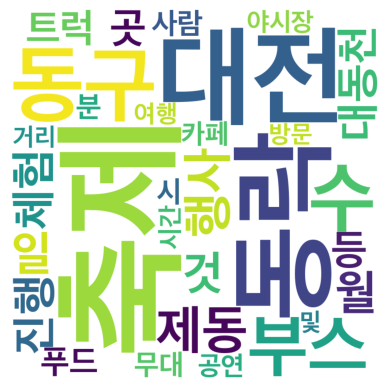

In [59]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Okt 객체 생성 (assuming clean_data2 is a DataFrame)
okt = Okt()

# 텍스트 전처리 (replace with your cleaning steps if needed)
#clean_data2['text'] = clean_data2['text'].str.replace("[^가-힣]", "", regex=True)  # Remove non-Korean characters
# 텍스트 전처리 (replace with your cleaning steps if needed)
clean_data2['text'] = clean_data2['text'].str.replace("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", regex=True)  # Remove non-Korean characters and spaces

# 단어 추출
final_result = defaultdict(list)
for idx, text in enumerate(clean_data2['text']):
    nouns = okt.nouns(text)
    final_result['nouns'].extend(nouns)

# 빈도수 상위 30개 단어 추출
word_counts = Counter(final_result['nouns'])
top_30_words = word_counts.most_common(30)

# 결과 출력
print("### 텍스트에서 많이 나온 단어 ###")
print(pd.DataFrame(top_30_words, columns=['단어', '빈도수']))
print("\n")

# 워드클라우드 생성 (assuming you have AppleSDGothicNeoB.ttf font)
wc = WordCloud(font_path='AppleSDGothicNeoB.ttf',
               width=400, height=400, scale=2.0,
               max_font_size=150, background_color='white')
wordcloud = wc.generate_from_frequencies(dict(top_30_words))

# 워드클라우드 이미지 출력
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [61]:
clean_data2

,text
0,대전동구동락축제를 홍보하는 직원들
1,이번 행사는 월 일일까지 일간 오전 시부터 밤 시까지 동구 소제동 동광장로 대동천 ...
3,주요 행사 내용은 프리미엄 야시장 동구동락 콘서트 소제랜덤 댄스 페스티벌 소제 여행...
4,대전동구동락축제 프리미엄 야시장 배치도
5,대전전통나래관 사거리를 중심으로 북측에 주 무대가 있고 남쪽에는 포토스팟과 프리미엄...
...,...
9129,동천 언니 부스를 보니 이게 설치 완료인 듯
9130,부스 구경하는 거 좋아하는 인입니다
9131,야간에 여기 불 들어오면 멋있을 듯
9132,월 대전축제인 대전동구 문화제야행


# 트립어드바이저 크롤링

In [43]:
# 웹 브라우저를 실행
driver = webdriver.Chrome()
## 네이버 요청
driver.get('https://www.tripadvisor.co.kr/')